In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [167]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
data.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [168]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [169]:
df = data[['ram', 'storage', 'screen', 'final_price']]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


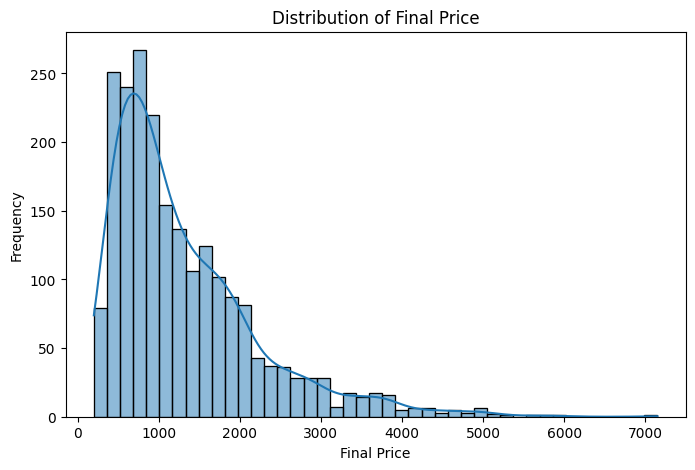

In [170]:
plt.figure(figsize=(8, 5))
sns.histplot(df['final_price'], kde=True)
plt.title('Distribution of Final Price')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

In [171]:
median_ram = df['ram'].median()
print(f'The median value for ram is: {median_ram}')

The median value for ram is: 16.0


In [172]:
missing_values = df.isnull().sum()
print(missing_values)

ram            0
storage        0
screen         4
final_price    0
dtype: int64


In [173]:
df['screen'] = df['screen'].fillna(0)
df.isnull().sum()

/tmp/ipykernel_6764/3441553451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['screen'] = df['screen'].fillna(0)


ram            0
storage        0
screen         0
final_price    0
dtype: int64

Shufflle, Split data in train/val/tests sets

In [174]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [175]:
index = np.arange(n)

In [176]:
np.random.shuffle(index)

In [177]:
df_train = df.iloc[index[n_train:]]
df_val = df.iloc[index[n_train:n_train + n_val]]
df_test = df.iloc[index[n_train + n_val:]]

In [178]:
df_train = df_train.reset_index(drop =True)
df_val = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [179]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)


In [180]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']



Train Linear Regression Model

In [181]:
X_train = df_train[['ram','storage','screen']].values
X_val = df_val[['ram','storage','screen']].values
X_test = df_test[['ram','storage','screen']].values

In [182]:
y_train

array([7.54433211, 6.10924758, 7.45667406, 6.73340189, 6.43935037,
       7.69621264, 8.29404964, 7.54961443, 6.44565633, 7.54961443,
       6.86788075, 7.36644515, 6.64639051, 7.20785987, 6.44917416,
       8.41183268, 6.86569293, 7.31322705, 6.46985479, 8.0063709 ,
       6.31896811, 6.3473717 , 6.62390585, 6.38706449, 6.56618004,
       5.94017125, 7.31322039, 7.95822719, 6.2146081 , 6.72397666,
       6.73933663, 5.94017125, 6.7058961 , 7.3395377 , 6.04025471,
       6.73487699, 6.74523635, 7.59085212, 7.97768685, 6.89721998,
       6.57527108, 7.88248094, 8.22922041, 7.17283892, 5.82894562,
       7.45654121, 7.38239813, 7.57604608, 7.13933514, 6.10208869,
       6.64429742, 6.39692966, 6.39692966, 6.87729607, 7.34601021,
       5.99948232, 6.10231248, 7.86326672, 7.29629801, 6.35610766,
       7.1484165 , 7.63482068, 7.07625678, 6.95104463, 7.9373747 ,
       6.36304534, 6.34532052, 7.53851629, 6.78165903, 7.82404601,
       8.00636757, 6.315358  , 6.99715713, 7.43838353, 6.16749

In [183]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:] 

w0,w = train_linear_regression(X_train, y_train)

In [184]:
y_pred = w0 + X_train.dot(w)

In [185]:
def rmse(y_pred,y):
    err = y - y_pred
    se_err = err ** 2
    mse = se_err.mean()
    return np.sqrt(mse)

Validating the model

In [186]:
w0,w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_val.dot(w)

rmse(y_val,y_pred)

np.float64(0.4407828861221878)

fill nan values with mean

In [25]:
X = df_train.values
X

array([[   8.  ,  512.  ,   15.6 ,  517.01],
       [  32.  , 1000.  ,   17.3 , 2599.  ],
       [  16.  , 1000.  ,   12.3 , 2842.5 ],
       ...,
       [  16.  , 1000.  ,   15.6 , 1049.  ],
       [  16.  ,  512.  ,   14.  , 1671.  ],
       [  16.  ,  512.  ,   15.6 ,  755.  ]])

In [21]:
train_linear_regression

,ram,storage,screen
1357,8,512,15.6
1055,32,1000,17.3
513,16,1000,12.3
81,32,1000,15.6
1803,32,1000,15.6
...,...,...,...
1638,16,512,15.6
1095,8,512,15.6
1130,16,1000,15.6
1294,16,512,14.0
